## Rage in the (Nicolas) Cage

Nicolas Cage has undoubtedly one of the most eclectic filmographies in Hollywood. The same guy that falls in IMDB's top 75 percentile of highest paid actors also has an average Rotten Tomato score of less than 50%. And with over 100 screened roles credited to his name, it can certainly be said that Cage is a guy who is willing to try anything at least 4 times. This project will be mostly exploratory, taking a deep dive into the career of Ole Saint Nick. Then, I'll build a reccomendation system that will deliver suggestions of other films you might enjoy based off of similarity in Genre.

In [1]:
import pandas as pd
import numpy as np
import indy_proj_wr as wr

import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sb

from scipy import stats
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

#### Acquire

The original dataset was acquired via a csv file from a kaggle database created by Em Highland (ehartlett). 
**Original Shape:** 100 rows x 6 columns

My first step in acquisition was manually adding the box office earnings for each film into a csv.

Original and added features can be found in this handy dandy data dictionary:

In [2]:
pd.read_csv('nickyc_dd.csv').drop(index=[10,11])

,Feature,Description,Type,Status
0,Movie,title of film featuring the incomperable Nic C...,object,original
1,Rating,maturity rating for each film,object,original
2,Character,name of character with the honor of being potr...,object,original
3,Voice,indicates whether a role incorporated voice ac...,integer,original
4,Year,the year Mr. Cage blessed us with a particular...,integer,original
5,RottenTomatoes,calculated Rotten Tomato score for each film,obj -> float,original
6,Earnings,total worldwide and domestic earnings for each...,integer,added
7,Genre,the genre of each glorious film,object,added
8,Rating_num,enumerated version of maturity rating,integer,added
9,Genre_num,enumerated version of genre,integer,added


In [3]:
nic = wr.acq_nic()

In [4]:
nic

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,27093116
2,Rumble Fish,R,Smokey,0,1983,74,2494480
3,Valley Girl,R,Randy,0,1983,83,16800000
4,Birdy,R,Al Columbato,0,1984,83,1400000
...,...,...,...,...,...,...,...
96,The Croods: A New Age,PG,Grug,1,2020,77,214790246
97,Jiu Jitsu,R,Wylie,0,2020,28,7427
98,Pig,R,Robin Feld,0,2021,97,3875079
99,Willy's Wonderland,NR,The Janitor,0,2021,61,430445


In [5]:
nic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Movie           101 non-null    object
 1   Rating          101 non-null    object
 2   Character       101 non-null    object
 3   Voice           101 non-null    int64 
 4   Year            101 non-null    int64 
 5   RottenTomatoes  101 non-null    object
 6   Earnings        101 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


#### Prepare

My prepare phase included manually assigning a genre to each film as a feature and enumerating Genre and Rating. Within RottenTomatoes, my missing values are identified as 'X' rather than nulls, so I also dropped those values and converted RottenTomatoes to a float.

Functions called:
 - assigne_genre(Movie)
 - prep_nic(df)

In [6]:
nic[nic.RottenTomatoes == 'X']

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0
13,Never on Tuesday,R,Man in Red Sports Car,0,1989,X,0
14,Industrial Symphony No. 1: The Dream of the Br...,TV-NR,Heartbreaker,0,1990,X,0
82,Vengeance: A Love Story,TV-MA,John,0,2017,X,73270
92,Kill Chain,R,Ara–a,0,2019,X,12787


In [7]:
nic['Movie']

0                 The Best of Times
1      Fast Times at Ridgemont High
2                       Rumble Fish
3                       Valley Girl
4                             Birdy
                   ...             
96            The Croods: A New Age
97                        Jiu Jitsu
98                              Pig
99               Willy's Wonderland
100      Prisoners of the Ghostland
Name: Movie, Length: 101, dtype: object

In [8]:
def assign_genre(Movie):
    """ This ridiculously long function classifies each of Mr. Cage's timeless works according to 
    genre."""
    if 'Drive Angry' in Movie:
        return 'Action'
    elif 'Gone in 60 Seconds' in Movie:
        return 'Action'
    elif 'Dying of the Light' in Movie:
        return 'Action'
    elif 'Face/Off' in Movie:
        return 'Action'
    elif 'Ghost Rider' in Movie:
        return 'Action'
    elif 'Ghost Rider: Spirit of Vengeance' in Movie:
        return 'Action'
    elif 'The Rock' in Movie:
        return 'Action'
    elif "Captain Corelli's Mandolin" in Movie:
        return 'Action'
    elif "Snake Eyes" in Movie:
        return 'Action'
    elif 'Kiss of Death' in Movie:
        return 'Action'
    elif 'Deadfall' in Movie:
        return 'Action'
    elif 'Left Behind' in Movie:
        return 'Action'
    elif 'Gone in Sixty Seconds' in Movie:
        return 'Action'
    elif 'Jiu Jitsu' in Movie:
        return 'Action'
    elif 'Outcast' in Movie:
        return 'Action'
    elif 'Leaving Las Vegas' in Movie:
        return 'Drama'
    elif 'Raising Arizona' in Movie:
        return 'Drama'
    elif 'Adaptation' in Movie:
        return 'Drama'
    elif 'Birdy' in Movie:
        return 'Drama'
    elif 'Pig' in Movie:
        return 'Drama'
    elif 'Rumble Fish' in Movie:
        return 'Drama'
    elif 'Moonstruck' in Movie:
        return 'Drama'
    elif 'Bringing Out the Dead' in Movie:
        return 'Drama'
    elif 'Wild at Heart' in Movie:
        return 'Drama'
    elif 'Sonny' in Movie:
        return 'Drama'
    elif 'Never on Tuesday' in Movie:
        return 'Drama'
    elif 'World Trade Center' in Movie:
        return 'Drama'
    elif 'Zandalee' in Movie:
        return 'Drama'
    elif 'The Boy in Blue' in Movie:
        return 'Drama'
    elif 'Matchstick Men' in Movie:
        return 'Action'
    elif 'Kick-Ass' in Movie:
        return 'Action'
    elif 'Arsenal' in Movie:
        return 'Action'
    elif 'Lord of War' in Movie:
        return 'Drama'
    elif 'Inconceivable' in Movie:
        return 'Drama'
    elif 'City of Angels' in Movie:
        return 'Drama'
    elif 'Red Rock West' in Movie:
        return 'Drama'
    elif 'The Weather Man' in Movie:
        return 'Drama'
    elif 'Racing with the Moon' in Movie:
        return 'Drama'
    elif 'The Runner' in Movie:
        return 'Drama'
    elif 'Red Rock West' in Movie:
        return 'Thriller'
    elif 'Time to Kill' in Movie:
        return 'Thriller'
    elif '8MM' in Movie:
        return 'Thriller'
    elif 'The Trust' in Movie:
        return 'Thriller'
    elif 'The Frozen Ground' in Movie:
        return 'Thriller'
    elif 'Vengeance: A Love Story' in Movie:
        return 'Thriller'
    elif 'The Trust' in Movie:
        return 'Thriller'
    elif 'Seeking Justice' in Movie:
        return 'Thriller'
    elif 'Snake Eyes' in Movie:
        return 'Thriller'
    elif 'Stolen' in Movie:
        return 'Thriller'
    elif 'Trespass' in Movie:
        return 'Thriller'
    elif 'Windtalkers' in Movie:
        return 'Thriller'
    elif 'Grand Isle' in Movie:
        return 'Thriller'
    elif 'Primal' in Movie:
        return 'Thriller'
    elif 'Kill Chain' in Movie:
        return 'Thriller'
    elif 'Bangkok Dangerous' in Movie:
        return 'Action'
    elif 'Antigang' in Movie:
        return 'Thriller'
    elif 'Running with the Devil' in Movie:
        return 'Thriller'
    elif 'A Score to Settle' in Movie:
        return 'Thriller'
    elif 'Between Worlds' in Movie:
        return 'Thriller'
    elif 'Snowden' in Movie:
        return 'Thriller'
    elif 'Con Air' in Movie:
        return 'Thriller'
    elif 'Looking Glass' in Movie:
        return 'Thriller'
    elif 'Joe' in Movie:
        return 'Thriller'
    elif 'Dog Eat Dog' in Movie:
        return 'Thriller'
    elif 'Tokarev' in Movie:
        return 'Thriller'
    elif 'Next' in Movie:
        return 'Sci/Fi'
    elif 'Knowing' in Movie:
        return 'Sci/Fi'
    elif 'Color Out of Space' in Movie:
        return 'Sci/Fi'
    elif 'Pay the Ghost' in Movie:
        return 'Sci/Fi'
    elif 'Next' in Movie:
        return 'Sci/Fi'
    elif 'Season of the Witch' in Movie:
        return 'Sci/Fi'
    elif 'The Humanity Bureau' in Movie:
        return 'Sci/Fi'
    elif "Willy's Wonderland" in Movie:
        return 'Horror'
    elif 'Prisoners of the Ghostland' in Movie:
        return 'Horror'
    elif 'Grindhouse' in Movie:
        return 'Horror'
    elif "Mandy" in Movie:
        return 'Horror'
    elif 'Mom and Dad' in Movie:
        return 'Horror'
    elif 'Pay the Ghost' in Movie:
        return 'Horror'
    elif 'The Wicker Man' in Movie:
        return 'Horror'
    elif 'National Treasure' in Movie:
        return 'Family'
    elif 'National Treasure: Book of Secrets' in Movie:
        return 'Family'
    elif 'The Croods' in Movie:
        return 'Family'
    elif 'The Croods: A New Age' in Movie:
        return 'Family'
    elif "The Sorceror's Apprentice" in Movie:
        return 'Family'
    elif 'Spider-Man: Into the Spider-Verse' in Movie:
        return 'Family'
    elif 'Teen Titans Go! To the Movies' in Movie:
        return 'Family'
    elif 'Astro Boy' in Movie:
        return 'Family'
    elif 'G-Force' in Movie:
        return 'Family'
    elif 'The Ant Bully' in Movie:
        return 'Family'
    elif 'Christmas Carol: The Movie' in Movie:
        return 'Family'
    elif 'Moonstruck' in Movie:
        return 'RomCom'
    elif 'Trapped in Paradise' in Movie:
        return 'RomCom'
    elif 'It Could Happen to You' in Movie:
        return 'RomCom'
    elif 'Peggy Sue Got Married' in Movie:
        return 'RomCom'
    elif 'Honeymoon in Vegas' in Movie:
        return 'RomCom'
    elif 'Valley Girl' in Movie:
        return 'RomCom'
    elif 'City of Angels' in Movie:
        return 'RomCom'
    elif 'The Family Man' in Movie:
        return 'RomCom'
    elif 'Fast Times at Ridgemont High' in Movie:
        return 'RomCom'
    elif 'Windtalkers' in Movie:
        return 'War'
    elif 'USS Indianapolis: Men of Courage' in Movie:
        return 'War'
    elif 'Fire Birds' in Movie:
        return 'War'
    elif 'Industrial Symphony No. 1: The Dream of the Brokenhearted' in Movie:
        return 'Music'
    elif 'The Best of Times' in Movie:
        return 'Comedy'
    elif 'Amos and Andrew' in Movie:
        return 'Comedy'
    elif 'Guarding Tess' in Movie:
        return 'Comedy'
    elif "Vampire's Kiss" in Movie:
        return 'Comedy'
    elif 'Army of One' in Movie:
        return 'Comedy'
    elif 'Bad Lieutenant: Port of Call New Orleans' in Movie:
        return 'Crime'
    elif 'The Cotton Club' in Movie:
        return 'Crime'
    elif '211' in Movie:
        return 'Crime' 
    else:
        return 'Unknown'
   

In [9]:
nic['Genre'] = nic['Movie'].apply(assign_genre)
nic.head(3)

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre
0,The Best of Times,TV-NR,Nicholas,0,1981,X,0,Comedy
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78,27093116,RomCom
2,Rumble Fish,R,Smokey,0,1983,74,2494480,Drama


In [10]:
nic = wr.prep_nic(nic)

In [11]:
nic.head(3)

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num
0,The Best of Times,TV-NR,Nicholas,0,1981,NaN,0,Comedy,4,8
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78.0,27093116,RomCom,3,5
2,Rumble Fish,R,Smokey,0,1983,74.0,2494480,Drama,3,1


#### Exploration

Let's take a look at the distribution of Cage's films. To generate these visualizations, I ran my prep function so that my earnings and genres would be included. Then, I downloaded that dataframe as a csv to use in Tableau.

In [12]:
%%html
<div class='tableauPlaceholder' id='viz1684411362285' style='position: relative'><noscript><a href='#'><img alt='Earnings by Maturity Rating for Nicholas Cage Films  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage&#47;earnings_rating&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nic_cage&#47;earnings_rating' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage&#47;earnings_rating&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /><param name='ignore_sticky_session' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1684411362285');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [13]:
%%html
<div class='tableauPlaceholder' id='viz1684413139649' style='position: relative'><noscript><a href='#'><img alt='Total Revenue For Nicolas Cage Films By Genre ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_earnings_genre&#47;earnings_genre&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nic_cage_earnings_genre&#47;earnings_genre' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_earnings_genre&#47;earnings_genre&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1684413139649');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Surprisingly, although he's only done a few of them, it looks like Family friendly films are Cage's highest grossing projects!

#### Statistical Analysis

**Question 1**

Which genre brings an average of higher ratings for Nicky, thrillers or dramas?

Null Hypothesis: Nic Cage Dramas do not have higher ratings than his thrillers.

Hypothesis: Nic Cage Dramas have higher ratings than his thrillers.

Text(0.5, 1.0, 'Distribution of RottenTomatoes Ratings for Nic Cage Dramas')

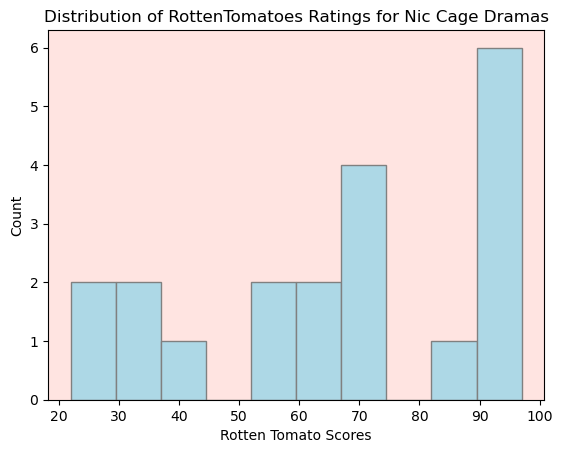

In [28]:
# Distribution Viz
dramatom = nic[nic.Genre == 'Drama'].RottenTomatoes
ax = plt.axes()
ax.set_facecolor("mistyrose")
ax.ticklabel_format(style='plain')
# plt.style.use('seaborn-deep')
plt.hist(dramatom, color = "lightblue", ec="grey")
plt.xlabel('Rotten Tomato Scores')
plt.ylabel('Count')
plt.title('Distribution of RottenTomatoes Ratings for Nic Cage Dramas')

In [15]:
nic[nic.Genre=='Drama'].value_counts().sum()

20

Text(0.5, 1.0, 'Distribution of RottenTomatoes Ratings for Nic Cage Thrillers')

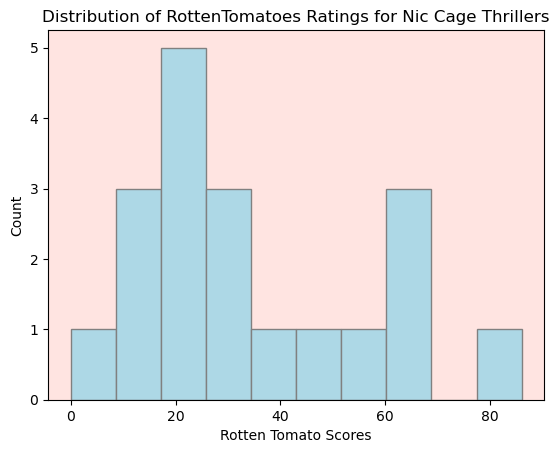

In [30]:
thrilltom= nic[nic.Genre == 'Thriller'].RottenTomatoes
ax = plt.axes()
ax.set_facecolor("mistyrose")
ax.ticklabel_format(style='plain')
plt.hist(thrilltom, color = "lightblue", ec="grey")
plt.xlabel('Rotten Tomato Scores')
plt.ylabel('Count')
plt.title('Distribution of RottenTomatoes Ratings for Nic Cage Thrillers')

Note

An early look at the distribution shows that Nic has some alarmingly low ratings for his thrillers! Let's see if there's equal variance between the drama ratings and thriller ratings.

In [17]:
wr.genre_test(nic)

T-statistic: 4.149
P-value: 0.000
We reject the null hypothesis


**Question 2**

Do Cage's later films get better or worse ratings than the earlier films?

Null Hypothesis: Cage's films in the last decade recieve lower RT scores than his earlier works. Hypothesis: Cage's films in the last decade recieve higher RT scores than his earlier works.

In [18]:
%%html
<div class='tableauPlaceholder' id='viz1684412271217' style='position: relative'><noscript><a href='#'><img alt='Distribution of Rotten Tomato Scores in Last Decade ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_rt_decade&#47;rt_dist2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nic_cage_rt_decade&#47;rt_dist2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_rt_decade&#47;rt_dist2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1684412271217');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [19]:
%%html
<div class='tableauPlaceholder' id='viz1684412378005' style='position: relative'><noscript><a href='#'><img alt='Distribution of Rotten Tomato Scores by Year(1982-2009) ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_rt_2009&#47;rt_dist_2009&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='nic_cage_rt_2009&#47;rt_dist_2009' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ni&#47;nic_cage_rt_2009&#47;rt_dist_2009&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1684412378005');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Notes

These interactive visualizations allow me to see the full distribution of RT scores. I want to know if the last decade of film making (2011-2021) have seen significant improvement in Cage's film ratings compared to his overall average score. To determine that, I need to establish a baseline mean to measure the last 10 years against.

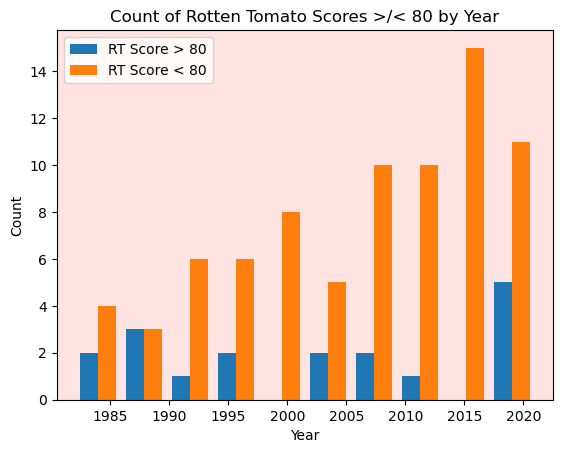

Variance of high RT Scores for last decade: 24.566666666666663
Variance of all time high RT Scores: 20.720588235294116
Number of Films made after 2010 with RT scores of 80 and above: 6
Number of Films made since 1983 with RT scores of 80 and above: 17
Average High RT score for post-2010 films: 91.17
Average High RT score for all films: 88.71
Average Rotten Tomato Score for post-2010 films: 42.05714285714286
Average Rotten Tomato Score for all films: 47.31578947368421


In [20]:
wr.high_rt_chart(nic)
wr.question_3(nic)

**Observations**

After computing for variance, I've determined that this data is non-parametric. I can't use a t-test to analyze the relationship between my data, but a Mann-Whitney test is built to measure non-parametric data. Let's see if we have better luck with that.

In [21]:
# This will return all of the movies made after 2011 with RT scores over 80
rog =  nic[(nic.Year >=2011) & (nic.RottenTomatoes >=80)]
# This will return all of the movies recorded with RT scores over 80
ham = nic[(nic.Year <2021) & (nic.RottenTomatoes >=80)]

In [22]:
from scipy.stats import mannwhitneyu
stat, p =mannwhitneyu(rog.RottenTomatoes, ham.RottenTomatoes)
if p < 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


#### Notes

Even though the average score for post-2010 films is higher overall **and** when controlling for high RT scores, I don't have enough evidence to support my hypothesis. I believe that is because there simply haven't been enough films made in the last 10-year window. Perhaps after a few more years, I can revisit this dataset with more recent films and see if my hypothesis is proven then.

### Suggestion Algorithm

During my initial tinkering with this dataframe, I realized that it would be difficult to perform modeling on it with such a small dataset. Instead, I've decided to create a suggestion algorithm that makes reccomendations for Nicolas Cage films based on previous films watched.

Steps:

1. Vectorize the Dataframe
2. Build the System

In [23]:
nic.head()

,Movie,Rating,Character,Voice,Year,RottenTomatoes,Earnings,Genre,Rating_num,Genre_num
0,The Best of Times,TV-NR,Nicholas,0,1981,NaN,0,Comedy,4,8
1,Fast Times at Ridgemont High,R,Brad's Bud,0,1982,78.0,27093116,RomCom,3,5
2,Rumble Fish,R,Smokey,0,1983,74.0,2494480,Drama,3,1
3,Valley Girl,R,Randy,0,1983,83.0,16800000,RomCom,3,5
4,Birdy,R,Al Columbato,0,1984,83.0,1400000,Drama,3,1


In [24]:
wr.suggestion(nic)

What film did you enjoy? Pig


If you enjoyed "Pig", you might enjoy: 
                   Movie
13  Never on Tuesday
2        Rumble Fish


### Conclusion

This was a fun dataset to work with. I'd like to revisit it in the future to see how new films impact the overall results of my statistical analysis. I don't think that this is a dataset where modeling would be effective, but maybe I'm not asking the right questions yet. In addition, I'd like to revisit my suggestion function and see if I can build a dropdown menu in leui of the input function.